In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# from text_processing_functions import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.stem.porter import *
import re
import emoji
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
from os import path
from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import datetime

In [2]:
def remove_emoji(text):
    emoji_pattern = re.compile(pattern = "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

def remove_hashtag_mentions_urls(text):
    return re.sub(r"(?:\@|\#|https?\://)\S+", "", text)

def stopwords_ls(additional_stopwords):
    stop_list = stopwords.words('english')
    for word in additional_stopwords:
        stop_list.append(word)
    
    return stop_list

def text_preprocessing(df, column_name, stopword_list):
    output = []
    for text in df[column_name]:
        text = remove_hashtag_mentions_urls(text)
        text = remove_emoji(text)
        text_lower = [w.lower() for w in text_tokenize]
        text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
        text_stopremoved = [w for w in text_words_only if w not in stopword_list]

        output.append(text_stopremoved)

    return output

def demojize_text(df, column_name):
    emoji_decoded_tweets = []

    for text in df[column_name]:
        text = emoji.demojize(text)
        
        emoji_decoded_tweets.append(text)
    
    return emoji_decoded_tweets

def instagram_text_processing(df, stopword_list):

    text_processed = text_preprocessing(df, 'comment', stopword_list)

    text_demojize = demojize_text(df, 'comment')

    df['processed_text'] = text_processed
    df['demojize_text'] = text_demojize

    return df

In [3]:
def cleaned_text(df):

    tweet = df['Sentences']
    cleaned_text = ''

    for i in range(len(tweet)):
        text = tweet[i]
        # removing mentions, hashtags, URLs from tweet
        text = re.sub(r"(?:\@|\#|https?\://)\S+", "", text)
        text = remove_emoji(text)
        #separates the sentence by words
        text_tokenize = word_tokenize(text)

        text_lower = [w.lower() for w in text_tokenize]
        #removes anything that are not alphabets
        text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
        text_joined = " ".join(text_words_only)
        cleaned_text += text_joined + ' '

    return cleaned_text

In [4]:
def wordcloud(STOPWORDS, cleaned_text, save_location):
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=2000, height=1000).generate(cleaned_text)

    # Display the generated image:
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(save_location)

In [421]:
df = pd.read_csv('C:/Users/Gi Han/OneDrive - Singapore Management University/Desktop/Corex Topic Modelling/cb_valuable_corex_topics.csv')
df.head()

,Unnamed: 0,Sentences,Comment Datetime,Textblob_polarity_score,Textblob_subjectivity_score,Vader_neg_score,Vader_neu_score,Vader_pos_score,Vader_compound_score,Emotions,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20
0,0,kuma-mon wrote: Because need to handle issues ...,3/2/21,0.061806,0.607176,0.046,0.845,0.108,0.7272,fear,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4,kuma-mon wrote: Because need to handle issues ...,3/2/21,-0.025833,0.550833,0.070,0.816,0.114,0.7098,sadness,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5,kuma-mon wrote: Because need to handle issues ...,3/2/21,-0.042361,0.521528,0.088,0.793,0.119,0.6133,sadness,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7,"For electricity, use lesser aircon should be o...",3/2/21,0.250000,0.500000,0.000,0.879,0.121,0.2960,anger,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8,"For me, I'm lucky the company already are usin...",3/2/21,0.333333,0.833333,0.000,0.909,0.091,0.4215,anger,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [422]:
# Sieving out based on topic

topic = df[df['topic_1'] == 1.0]
topic.reset_index(inplace = True)
topic.head()

,index,Unnamed: 0,Sentences,Comment Datetime,Textblob_polarity_score,Textblob_subjectivity_score,Vader_neg_score,Vader_neu_score,Vader_pos_score,Vader_compound_score,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20
0,3,7,"For electricity, use lesser aircon should be o...",3/2/21,0.250000,0.500000,0.000,0.879,0.121,0.2960,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,9,25,He had started moving cash to his Special Acco...,2/4/21,0.452381,0.523810,0.000,0.926,0.074,0.4019,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21,67,He had started moving cash to his Special Acco...,2/5/21,0.452381,0.523810,0.000,0.926,0.074,0.4019,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,24,71,getting used up.. u desperately seeking employ...,2/5/21,-0.400000,0.850000,0.151,0.849,0.000,-0.5859,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,91,since authoritative figure says masks is not r...,6/8/20,0.413889,0.563889,0.089,0.817,0.094,0.0624,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [365]:
emotion =  'joy' # 'fear', 'sadness', 'anger', 'joy'
topic_emotion = topic[topic['Emotions'] == emotion]
topic_emotion.reset_index(inplace = True)
topic_emotion.head()

,level_0,index,Unnamed: 0,Sentences,Comment Datetime,Textblob_polarity_score,Textblob_subjectivity_score,Vader_neg_score,Vader_neu_score,Vader_pos_score,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20
0,0,0,0,Another smart aleck \x93People should limit th...,21/2/21,0.138095,0.614286,0.00,0.909,0.091,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,3,110,427,"Dr. Ethan Will Taylor, PhD, Principal HIV/AIDS...",24/5/20,0.137500,0.637500,0.04,0.902,0.058,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# Wordcloud

In [367]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

original_stopwords = STOPWORDS
topic_STOPWORDS = set(original_stopwords)

# key_words = ['t','will']

# topic_STOPWORDS.update(key_words)
# topic_STOPWORDS = list(topic_STOPWORDS)

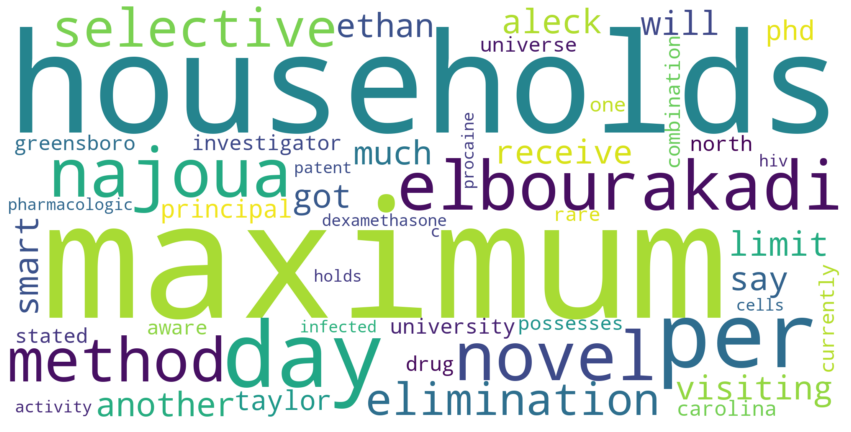

In [368]:
topic_cleaned = cleaned_text(topic_emotion)

# 'fear', 'sadness', 'anger', 'joy'

save_location = "C:/Users/Gi Han/OneDrive - Singapore Management University/Desktop/wordcloud/sd_t4_joy_wordcloud.png"
topic_wordcloud = wordcloud(topic_STOPWORDS, topic_cleaned, save_location)

# Getting top and bottom comment

In [20]:
df = pd.read_csv('C:/Users/Gi Han/OneDrive - Singapore Management University/Documents/SMT203 Computational Social Science/Project/Topic modelling/Corex Topic Modelling/sd_valuable_corex_topics.csv')
topic = df[df['topic_4'] == 1.0]
topic.reset_index(inplace = True)
topic.head()

,index,Unnamed: 0,Sentences,Comment Datetime,Textblob_polarity_score,Textblob_subjectivity_score,Vader_neg_score,Vader_neu_score,Vader_pos_score,Vader_compound_score,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20
0,0,0,Another smart aleck \x93People should limit th...,21/2/21,0.138095,0.614286,0.000,0.909,0.091,0.4019,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,8,42,LW only said limit 8 visitors per day but neve...,23/1/21,0.000000,1.000000,0.077,0.923,0.000,-0.0857,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,9,54,Impossible See how ppl go chalet or go hotel r...,23/1/21,-0.191667,0.600000,0.000,1.000,0.000,0.0000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,110,427,"Dr. Ethan Will Taylor, PhD, Principal HIV/AIDS...",24/5/20,0.137500,0.637500,0.040,0.902,0.058,0.1027,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,157,618,"Be strong, stay confident, it is not the end o...",4/6/20,-0.038333,0.621667,0.159,0.600,0.241,0.5770,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [21]:
# emotion =  'joy' # fear, sadness, anger, joy
emotion_list = ['fear', 'sadness', 'anger', 'joy']
reverse = []
for emotion in emotion_list: 
    topic_emotion = topic[topic['Emotions'] == emotion]
    topic_emotion = topic_emotion.sort_values(by = ['Vader_compound_score'], ascending = False)
    if emotion == 'joy':
        if len(topic_emotion) > 5:
            sentence = topic_emotion.head()
        else:
            sentence = topic_emotion
    else:
        if len(topic_emotion) > 5:
            sentence = topic_emotion.tail()
        else:
            sentence = topic_emotion
    
    print(emotion)
    if emotion != 'joy':
        sentence = sentence[::-1]
    
    count = 1
    for i in sentence['Sentences']:
        print (f'{count}) {i}')
        count += 1
    print()
    

fear
1) And I would argue him leaving a quarenteen hotel and risking setting off a deadly virus is way worse than driving 50 mph over the speed limit.
2) The doctors and nurses were covered from head to toe also get infected means the masks sterilised with Ethylene oxide, a cancer causing agent, only give a false sense of security!
3) > These include the increase in group size limits for key life events such as weddings and religious activities to 100 persons, but in multiple zones or time slots of at most 50 persons each to limit potential risk exposure.
4) The purpose of limited pax is to limit one's exposure to another person from a different household, thus limiting the exposure to potential covid 19.
5) Impossible See how ppl go chalet or go hotel room n break limit Plenty of such ppl ard How they catch island wide They r not enough officers to give out summons

sadness
1) LW only said limit 8 visitors per day but never limit the number of days to receive visitors.

anger
1) just 